![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [5]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [8]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [10]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Análisis sobre la variable season

In [13]:
# Medidas de tendencia central
bikes['season'].describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

In [15]:
# Medidas de tendencia central
bikes['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Esta variable contiene 4 valores enteros, cuyas codificaciones corresponden a las estaciones:  
1. Winter  
2. Spring  
3. Summer  
4. Fall

A partir de lo anterior, se concluye que existen 10.886 registros y según el recuento de los datos, estos están divididos de forma similar en las estaciones, salvo para el invierno. Respecto a la agruapción del conteo de bicicletas, para el verano se cuenta con el mayor recuento de bicicletas, es decir, es la estación en la cual el alquiler de bicicletas fue mayor.


### Análisis sobre la variable hour

Respecto a la hora de alquiler de las bicicletas y el promedio de utlización por hora de estas, su mayor utilización corresponde entre las 7-9 AM y 5-7 PM, al inicio y en la finalización del horario laboral. Adicionalmente, es posible evidenciar que el servicio de alquiler está disponible las 24 horas del día, siendo las horas de la madrugada las de menor utilización del servicio, entre la media noche y las 6 am.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

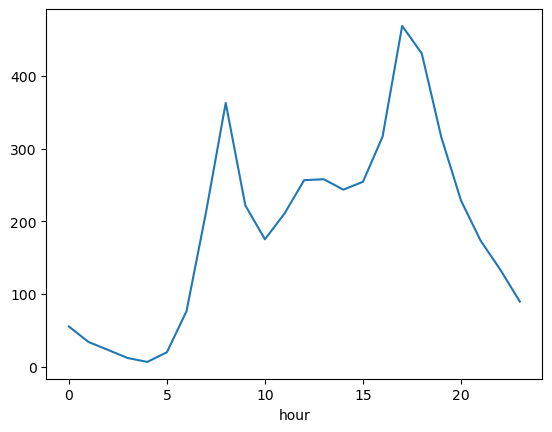

In [21]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
import matplotlib.pyplot as plt
bikes.groupby('hour').total.mean().plot()
plt.show()

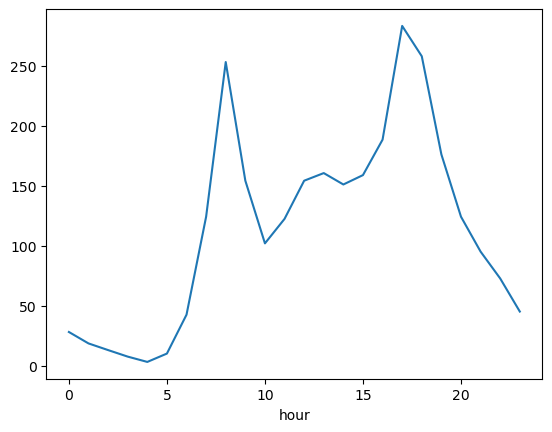

In [23]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikeswinter = bikes[bikes['season'] == 1]
bikeswinter.groupby('hour').total.mean().plot()
plt.show()

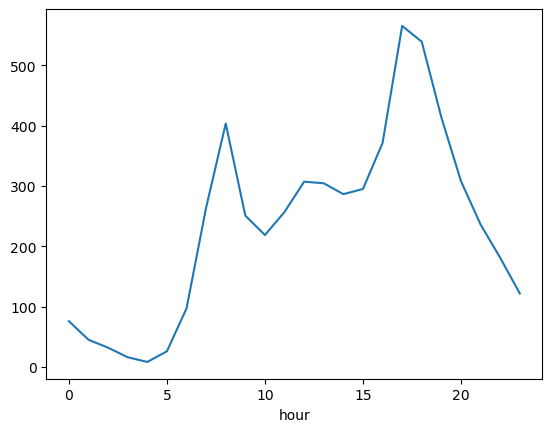

In [25]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikessummer = bikes[bikes['season'] == 3]
bikessummer.groupby('hour').total.mean().plot()
plt.show()

### Análisis
Al analizar los gráficos del número promedio de bicicletas rentadas por hora, tanto considerando todos los registros como segmentando por invierno y verano, se observa que la tendencia horaria se mantiene constante en todas las estaciones. Es decir, la distribución de los picos de demanda sigue el mismo patrón, con mayor uso en las mañanas 7-9 AM y tardes 5-7 PM, lo que sugiere una la relación del alquiler con los horarios laborales.

La principal diferencia se evidencia en el nivel del promedio de bicicletas rentadas, puesto que en invierno el número de alquileres es menor que en verano. Lo anterior indica que, aunque la estacionalidad se mantiene, el volumen de bicicletas rentadas sí varía en función de la estación del año.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [104]:
# Celda 3
# Separación de variables predictoras y de respuesta
XTotal = bikes[['season', 'hour']]
yTotal = bikes['total']

In [106]:
# Utilizamos el método get dummies para eliminar la escala de la variable season
XTotal = pd.get_dummies(XTotal, columns = ['season'], drop_first=True)

In [108]:
# Convertimos las variables en enteros
XTotal = XTotal.astype(int)
XTotal

,hour,season_2,season_3,season_4
datetime,,,,
2011-01-01 00:00:00,0,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,2,0,0,0
2011-01-01 03:00:00,3,0,0,0
2011-01-01 04:00:00,4,0,0,0
...,...,...,...,...
2012-12-19 19:00:00,19,0,0,1
2012-12-19 20:00:00,20,0,0,1
2012-12-19 21:00:00,21,0,0,1


In [110]:
# Separación de muestras de Train y Test
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

In [112]:
# Creación del modelo y entrenamiento
modelo = LinearRegression()
modelo.fit(XTrain, yTrain)

LinearRegression()

In [114]:
# Coeficiente e intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=XTotal.columns)
intercepto = modelo.intercept_

In [120]:
y_pred = modelo.predict(XTest)

In [126]:
mse_punto3 = mean_squared_error(yTest, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 25644.42


In [128]:
# Imprimimos los valores
print("Intercepto:", intercepto)
print("\nCoeficientes:")
print(coeficientes)

Intercepto: -9.563071266089395

Coeficientes:
hour         10.628739
season_2    100.907768
season_3    119.018664
season_4     87.247390
dtype: float64


### Análisis

**Intercepto:** Este indica que cuando la hora y las demás variables son 0, el modelo está estimando bicicletas negativas. Esto puede deberse a que cuando todas las variables son cero, significa que invierno es 1. En tanto, a media noche y en invierno no hay un alquiler real de bicicletas.  
**Coeficientes:**  
  1. Hour: A medida que avanza el día, el alquiler de bicicletas promedio aumenta en 10 unidades.  
  2. Seasons: En verano se alquilan en promedio 19 bicicletas más que en primavera. A su vez, en primavera se alquilan 13 bicicletas más que en otoño respectivamente.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [69]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [73]:
# Definición del gini impurity
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [67]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [69]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [149]:
# Aplicación de la función tree_grow
tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=6, num_pct=10)

{'y_pred': 1,
 'y_prob': 189.5754626456477,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 7293,
 'gain': 18468.385092517958,
 'sl': {'y_pred': 1,
  'y_prob': 53.810755336617405,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 2434,
  'gain': 6695.472699532862,
  'sl': {'y_pred': 1,
   'y_prob': 32.42043863742417,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 2141,
   'gain': 602.8207067436908,
   'sl': {'y_pred': 1,
    'y_prob': 25.225806451612904,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 1827,
    'gain': 398.9725847695497,
    'sl': {'y_pred': 1,
     'y_prob': 44.7456,
     'level': 4,
     'split': [0, 1.0],
     'n_samples': 623,
     'gain': 220.79646406025313,
     'sl': {'y_pred': 1,
      'y_prob': 55.06070287539936,
      'level': 5,
      'split': [2, 1.0],
      'n_samples': 311,
      'gain': 261.71590968282817,
      'sl': {'y_pred': 1,
       'y_prob': 48.26609442060086,
       'level': 6,
       'split': -1,
       'n_samples': 231,
       'gai

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [162]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad
accuracy_scores = []

In [164]:
# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [166]:
# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='accuracy').mean())

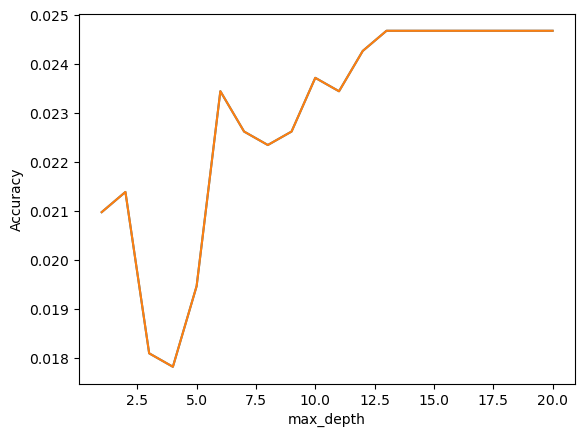

In [170]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [172]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.024679707612229176, 20)

In [186]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=15, random_state=1)
clf.fit(XTrain, yTrain)

DecisionTreeClassifier(max_depth=15, random_state=1)

In [182]:
from sklearn import metrics
#Se calculan las probabilidades
y_pred = clf.predict(XTest)
prediccionesProb=clf.predict_proba(XTest)
print("Accuracy:", metrics.accuracy_score(yTest, y_pred))

Accuracy: 0.02393543000278319


In [184]:
from sklearn.metrics import mean_squared_error
mse_punto5 = mean_squared_error(yTest, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 31117.76


### Comparativo

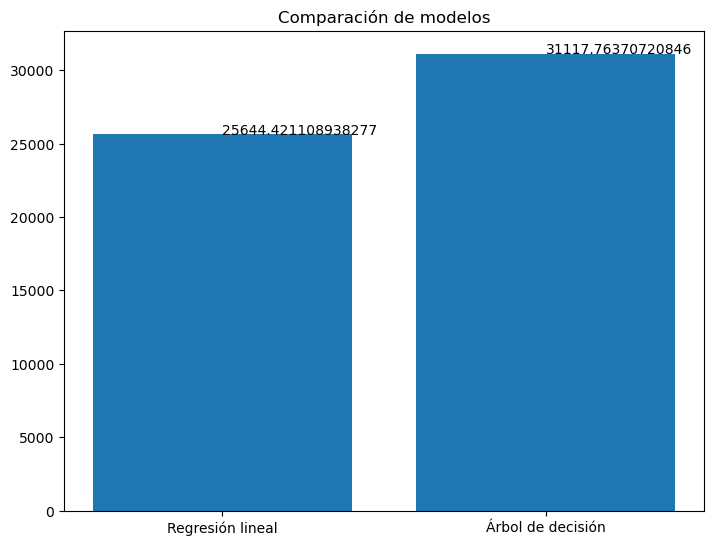

In [154]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Regresión lineal', 'Árbol de decisión']
ejeY = [mse_punto3,mse_punto5]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Conclusión


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [189]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [191]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [193]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

### Desicion Tree

In [231]:
from sklearn.metrics import accuracy_score, f1_score
decisiontree = DecisionTreeClassifier(max_depth=4, random_state=42)
decisiontree.fit(X_train, y_train)
y_pred_tree = decisiontree.predict(X_test)

In [233]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
print(f"Decision Tree - Accuracy: {accuracy_tree:.2f}, F1-Score: {f1_tree:.2f}")

Decision Tree - Accuracy: 0.65, F1-Score: 0.63


### Regresión logística

In [235]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [237]:
accuracy_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
print(f"Logistic Regression - Accuracy: {accuracy_log:.2f}, F1-Score: {f1_log:.2f}")

Logistic Regression - Accuracy: 0.61, F1-Score: 0.61


### Comparacion 

In [245]:
y_scores_tree = decisiontree.predict_proba(X_test)[:, 1]
y_scores_log = log_reg.predict_proba(X_test)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_scores_tree)
fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log)

auc_tree = auc(fpr_tree, tpr_tree)
auc_log = auc(fpr_log, tpr_log)

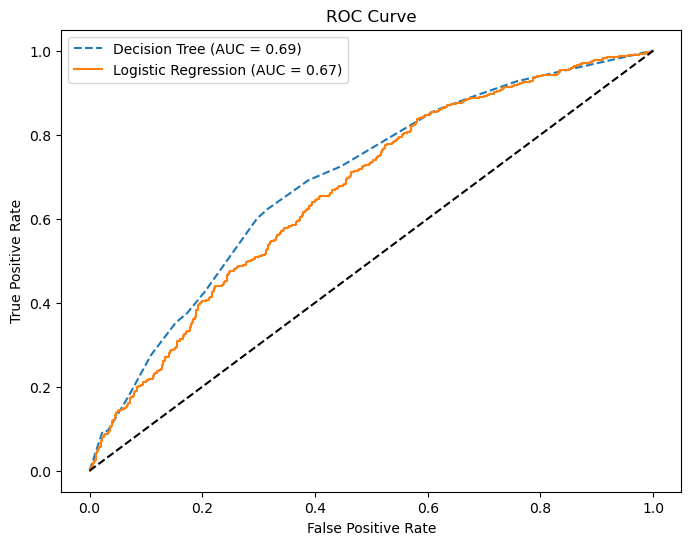

In [243]:
# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})", linestyle='--')
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Comparación  
En ambos escenarios el desempeño es muy similar, aunque en caso del arbol de decisión el desempeño es un 2% mayor que la regresión logística. Esto se ve representado gráficamente en la capacidad del modelo para mejorar su predición en la clase positiva.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [253]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Creación de 100 árboles 
bagging_tree_depth = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42), n_estimators=100, random_state=42)
bagging_tree_depth.fit(X_train, y_train)
y_pred_bagging_depth = bagging_tree_depth.predict(X_test)

# Creación de 100 árboles con min_samples_leaf ajustado
bagging_tree_leaf = BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=10, random_state=42),n_estimators=100, random_state=42)
bagging_tree_leaf.fit(X_train, y_train)
y_pred_bagging_leaf = bagging_tree_leaf.predict(X_test)

# Creación de 100 regresiones logísticas
bagging_log = BaggingClassifier(estimator=LogisticRegression(max_iter=200), n_estimators=100, random_state=42)
bagging_log.fit(X_train, y_train)
y_pred_bagging_log = bagging_log.predict(X_test)

# Evaluación de los modelos individuales
accuracy_bagging_depth = accuracy_score(y_test, y_pred_bagging_depth)
f1_bagging_depth = f1_score(y_test, y_pred_bagging_depth)

accuracy_bagging_leaf = accuracy_score(y_test, y_pred_bagging_leaf)
f1_bagging_leaf = f1_score(y_test, y_pred_bagging_leaf)

accuracy_bagging_log = accuracy_score(y_test, y_pred_bagging_log)
f1_bagging_log = f1_score(y_test, y_pred_bagging_log)

# Imprimir resultados de los modelos individuales
print(f"Bagging Decision Tree (max_depth) - Accuracy: {accuracy_bagging_depth:.2f}, F1-Score: {f1_bagging_depth:.2f}")
print(f"Bagging Decision Tree (min_samples_leaf) - Accuracy: {accuracy_bagging_leaf:.2f}, F1-Score: {f1_bagging_leaf:.2f}")
print(f"Bagging Logistic Regression - Accuracy: {accuracy_bagging_log:.2f}, F1-Score: {f1_bagging_log:.2f}")

# Votación mayoritaria sobre los modelos
preds = np.array([y_pred_bagging_depth, y_pred_bagging_leaf, y_pred_bagging_log])

# la votación mayoritaria
from scipy.stats import mode
majority_preds, _ = mode(preds, axis=0)

# Evaluación del ensamble con votación mayoritaria
accuracy_ensemble_majority = accuracy_score(y_test, majority_preds)
f1_ensemble_majority = f1_score(y_test, majority_preds)

# Imprimir resultados del ensamble de votación mayoritaria
print(f"Ensamble (Mayor votación) - Accuracy: {accuracy_ensemble_majority:.2f}, F1-Score: {f1_ensemble_majority:.2f}")

Bagging Decision Tree (max_depth) - Accuracy: 0.66, F1-Score: 0.66
Bagging Decision Tree (min_samples_leaf) - Accuracy: 0.66, F1-Score: 0.66
Bagging Logistic Regression - Accuracy: 0.62, F1-Score: 0.61
Ensamble (Mayor votación) - Accuracy: 0.66, F1-Score: 0.66


#### Análisis 
El resultado de los árboles de decisión, pese a la diferencia en el nivel de profundidad, es el mismo. Esto quiere decir que en algún punto de la ejecución de los modelos, ambos modelos alcanzan el óptimo de profundidad de las ramificaciones y no es posible mejorar el performance del modelo.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de Votación ponderada compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [264]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Creación de 100 árboles con max_depth ajustado
bagging_tree_depth = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
                                       n_estimators=100, random_state=42)
bagging_tree_depth.fit(X_train, y_train)
y_pred_bagging_depth = bagging_tree_depth.predict(X_test)

# Creación de 100 árboles con min_samples_leaf ajustado
bagging_tree_leaf = BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=10, random_state=42),
                                      n_estimators=100, random_state=42)
bagging_tree_leaf.fit(X_train, y_train)
y_pred_bagging_leaf = bagging_tree_leaf.predict(X_test)

# Creación de 100 regresiones logísticas
bagging_log = BaggingClassifier(estimator=LogisticRegression(max_iter=200),n_estimators=100, random_state=42)
bagging_log.fit(X_train, y_train)
y_pred_bagging_log = bagging_log.predict(X_test)

# Evaluación de los modelos individuales
accuracy_bagging_depth = accuracy_score(y_test, y_pred_bagging_depth)
f1_bagging_depth = f1_score(y_test, y_pred_bagging_depth)

accuracy_bagging_leaf = accuracy_score(y_test, y_pred_bagging_leaf)
f1_bagging_leaf = f1_score(y_test, y_pred_bagging_leaf)

accuracy_bagging_log = accuracy_score(y_test, y_pred_bagging_log)
f1_bagging_log = f1_score(y_test, y_pred_bagging_log)

# Imprimir resultados de los modelos individuales
print(f"Bagging Decision Tree (max_depth) - Accuracy: {accuracy_bagging_depth:.2f}, F1-Score: {f1_bagging_depth:.2f}")
print(f"Bagging Decision Tree (min_samples_leaf) - Accuracy: {accuracy_bagging_leaf:.2f}, F1-Score: {f1_bagging_leaf:.2f}")
print(f"Bagging Logistic Regression - Accuracy: {accuracy_bagging_log:.2f}, F1-Score: {f1_bagging_log:.2f}")

# Votación ponderada sobre los 300 modelos
# Asignamos pesos a los predictores de acuerdo con su cantidad de modelos: 100 para cada uno
weights = np.array([1/3, 1/3, 1/3])  # Ponderación igual entre los tres modelos
preds = np.array([y_pred_bagging_depth, y_pred_bagging_leaf, y_pred_bagging_log])

# Calculamos la votación ponderada
weighted_preds = np.average(preds, axis=0, weights=weights)

# La predicción final es 1 si la votación ponderada es mayor que 0.5, de lo contrario 0
final_pred_weighted = weighted_preds > 0.5

# Evaluación del ensamble ponderado
accuracy_ensemble_weighted = accuracy_score(y_test, final_pred_weighted)
f1_ensemble_weighted = f1_score(y_test, final_pred_weighted)

# Imprimir resultados del ensamble ponderado
print(f"Ensamblaje (Votación ponderada) - Accuracy: {accuracy_ensemble_weighted:.2f}, F1-Score: {f1_ensemble_weighted:.2f}")


Bagging Decision Tree (max_depth) - Accuracy: 0.66, F1-Score: 0.66
Bagging Decision Tree (min_samples_leaf) - Accuracy: 0.66, F1-Score: 0.66
Bagging Logistic Regression - Accuracy: 0.62, F1-Score: 0.61
Ensamblaje (Votación ponderada) - Accuracy: 0.66, F1-Score: 0.66


#### Análisis:
Igual que en el punto anterior, en el ejercicio, el ponderado sostiene el mismo valor debido a los valores de los árboles individuales, esto debido a su resultado similar al alcanzar el óptimo del valor del accuracy.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

**Votación Mayoritaria:** En el escenario con votación mayoritaria, cada modelo tiene el mismo peso en la decisión final y al elegir la clase más votada sin importar qué tan confiable sea cada modelo,no permite balancear posible overfitting de la muestra ante cambios en los datos. En el caso del ejercicio, puede funcionar bien en escenarios en que los modelos tienen desempeños muy similares y permite seleccionar el que posea un performance mayor.

**Votación Ponderada:** En el escenario de la votación ponderada, se asignan pesos diferentes a los modelos según su desempeño en el test de accuracy, lo cual permite darle más influencia a los modelos más precisos y robustecerlos contra el overfitting. Lo anterior 
es útil cuando algunos modelos son mejores que otros en ciertos aspectos, aunque en el caso anterior, los árboles tenían un desempeño igual.